## Деревья решений
## Цель работы
Научиться применять модель дерева принятия решений для задач классификации и регрессии.

## Содержание работы
1) Cгенерируйте данные для задачи классификации на три класса при помощи sklearn.datasets.make_blobs, содержащие два признака и 100 наблюдений. Визуализируйте их на диаграмме рассеяния.
2) Обучите модель классификационного решающего дерева sklearn.svm.DecisionTreeClassifier глубины 4 и критерием entropy.
3) Визуализируйте соответствующий граф дерева решений.
4) Визуализируйте полученные разделяющие области.
5) Оцените качество работы модели. Создайте новое наблюдение и сделайте предсказание на нём.
6) Cгенерируйте данные для задачи регрессии, содержащие один признак и 100 наблюдений, как случайный шум некоторой функции. Визуализируйте их на диаграмме рассеяния.
7) Обучите модель регрессионного решающего дерева sklearn.svm.DecisionTreeRegressor глубиной 3.
8) Визуализируйте соответствующий граф дерева решений.
9) Визуализируйте получившуюся кусочную линию регрессии.
10) Оцените качество работы модели. Создайте новое наблюдение и сделайте предсказание на нём.

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

### 1. Cгенерируйте данные для задачи классификации на три класса при помощи sklearn.datasets.make_blobs, содержащие два признака и 100 наблюдений. Визуализируйте их на диаграмме рассеяния.

Text(0, 0.5, 'X2')

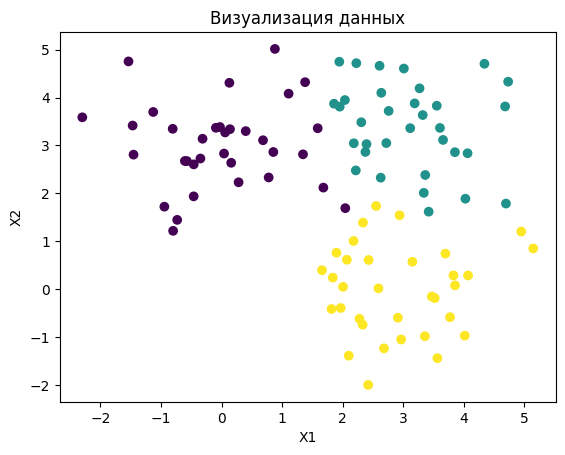

In [2]:
from sklearn.datasets import make_blobs
RANDOM_SEED = np.random.RandomState(0)
X, y = make_blobs(n_samples=100, centers=[(0,3),(3,3),(3,0)], 
                                      n_features=2, random_state=RANDOM_SEED,
                                      cluster_std=(0.9,0.9,0.9))
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.title('Визуализация данных')
plt.xlabel('X1')
plt.ylabel('X2')

### 2. Обучите модель классификационного решающего дерева sklearn.svm.DecisionTreeClassifier глубины 4 и критерием entropy.

In [3]:
from sklearn.tree import DecisionTreeClassifier
depth=4
clf_tree = DecisionTreeClassifier(criterion='entropy', max_depth=depth, 
                                  random_state=RANDOM_SEED)
clf_tree.fit(X, y)

DecisionTreeClassifier(criterion='entropy', max_depth=4,
                       random_state=RandomState(MT19937) at 0xFFFF4714B340)

### 3. Визуализируйте соответствующий граф дерева решений.

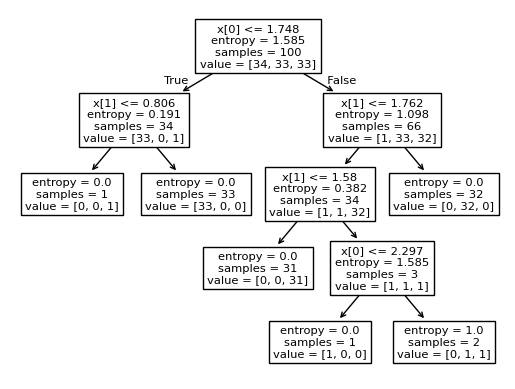

In [4]:
from sklearn.tree import plot_tree
plot_tree(clf_tree) 
plt.show()

### 4. Визуализируйте полученные разделяющие области.

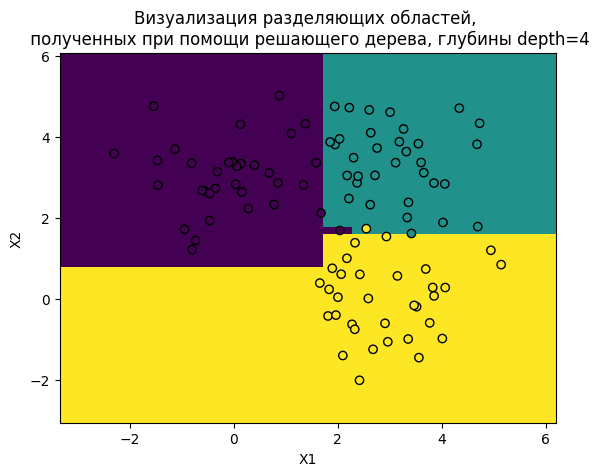

In [5]:
X0 = np.linspace(X[:, 0].min()-1,X[:, 0].max()+1, X.shape[0])
X1 = np.linspace(X[:, 1].min()-1,X[:, 1].max()+1, X.shape[0])
X0_grid, X1_grid = np.meshgrid(X0, X1)

y_predict = clf_tree.predict(np.c_[X0_grid.ravel(),X1_grid.ravel()]).reshape(X0_grid.shape)
plt.pcolormesh(X0_grid, X1_grid, y_predict)

plt.scatter(X[:, 0], X[:, 1], c=y,  edgecolors='black',linewidth=1)

plt.title('Визуализация разделяющих областей, \n полученных при помощи решающего дерева, глубины depth={}'.format(depth))
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

### 5. Оцените качество работы модели. Создайте новое наблюдение и сделайте предсказание на нём.

In [6]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
y_pred = clf_tree.predict(X)
print(confusion_matrix(y, y_pred))
print('Accuracy =', accuracy_score(y, y_pred))
print('F1_score =', f1_score(y, y_pred, average='micro'))

[[34  0  0]
 [ 0 33  0]
 [ 0  1 32]]
Accuracy = 0.99
F1_score = 0.99


In [7]:
observation_new = [[2, 1]]
clf_tree.predict(observation_new)

array([2])

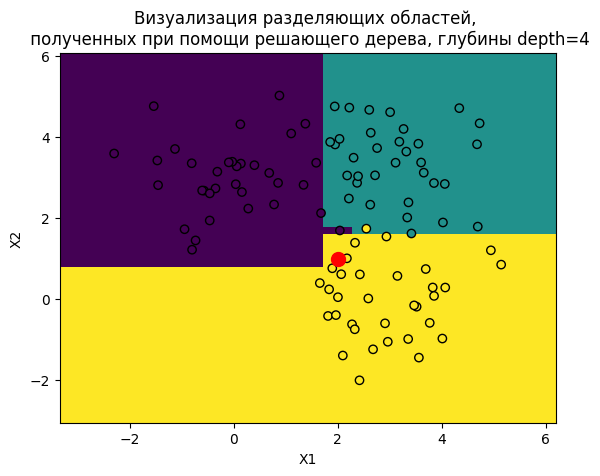

In [8]:
X0 = np.linspace(X[:, 0].min()-1,X[:, 0].max()+1, X.shape[0])
X1 = np.linspace(X[:, 1].min()-1,X[:, 1].max()+1, X.shape[0])
X0_grid, X1_grid = np.meshgrid(X0, X1)

y_predict = clf_tree.predict(np.c_[X0_grid.ravel(),X1_grid.ravel()]).reshape(X0_grid.shape)
plt.pcolormesh(X0_grid, X1_grid, y_predict)

plt.scatter(X[:, 0], X[:, 1], c=y,  edgecolors='black')
plt.scatter(observation_new[0][0], observation_new[0][1], c='r', s=100)

plt.title('Визуализация разделяющих областей, \n полученных при помощи решающего дерева, глубины depth={}'.format(depth))
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

### 6. Cгенерируйте данные для задачи регрессии, содержащие один признак и 100 наблюдений, как случайный шум некоторой функции. Визуализируйте их на диаграмме рассеяния.

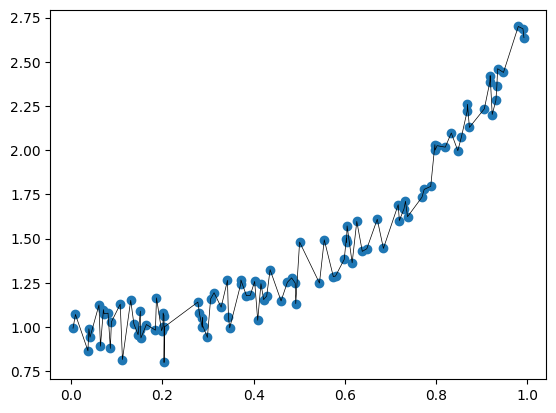

In [9]:
n_samples = 100
X = np.sort(np.random.rand(n_samples))
y = np.exp(X ** 2)+np.random.normal(0.0, 0.1, X.shape[0])
plt.scatter(X, y)
plt.plot(X, y, c='black', linewidth=0.5)

### 7. Обучите модель регрессионного решающего дерева sklearn.svm.DecisionTreeRegressor глубиной 3.

In [10]:
from sklearn.tree import DecisionTreeRegressor
depth=3
reg_tree = DecisionTreeRegressor(max_depth=depth, random_state=RANDOM_SEED)
reg_tree.fit(X.reshape(-1, 1), y)

DecisionTreeRegressor(max_depth=3,
                      random_state=RandomState(MT19937) at 0xFFFF4714B340)

### 8. Визуализируйте соответствующий граф дерева решений.

[Text(0.5, 0.875, 'x[0] <= 0.754\nsquared_error = 0.244\nsamples = 100\nvalue = 1.432'),
 Text(0.25, 0.625, 'x[0] <= 0.497\nsquared_error = 0.05\nsamples = 76\nvalue = 1.187'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'x[0] <= 0.302\nsquared_error = 0.015\nsamples = 56\nvalue = 1.077'),
 Text(0.0625, 0.125, 'squared_error = 0.008\nsamples = 35\nvalue = 1.012'),
 Text(0.1875, 0.125, 'squared_error = 0.007\nsamples = 21\nvalue = 1.185'),
 Text(0.375, 0.375, 'x[0] <= 0.701\nsquared_error = 0.018\nsamples = 20\nvalue = 1.495'),
 Text(0.3125, 0.125, 'squared_error = 0.012\nsamples = 15\nvalue = 1.441'),
 Text(0.4375, 0.125, 'squared_error = 0.002\nsamples = 5\nvalue = 1.659'),
 Text(0.75, 0.625, 'x[0] <= 0.862\nsquared_error = 0.07\nsamples = 24\nvalue = 2.207'),
 Text(0.625, 0.75, '  False'),
 Text(0.625, 0.375, 'x[0] <= 0.793\nsquared_error = 0.016\nsamples = 10\nvalue = 1.955'),
 Text(0.5625, 0.125, 'squared_error = 0.001\nsamples = 3\nvalue = 1.769'),
 Text(0.6875, 0.125, 'squa

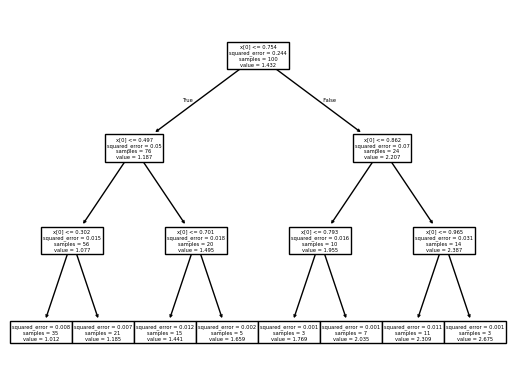

In [11]:

plot_tree(reg_tree)

### 9. Визуализируйте получившуюся кусочную линию регрессии.

Text(0, 0.5, 'y')

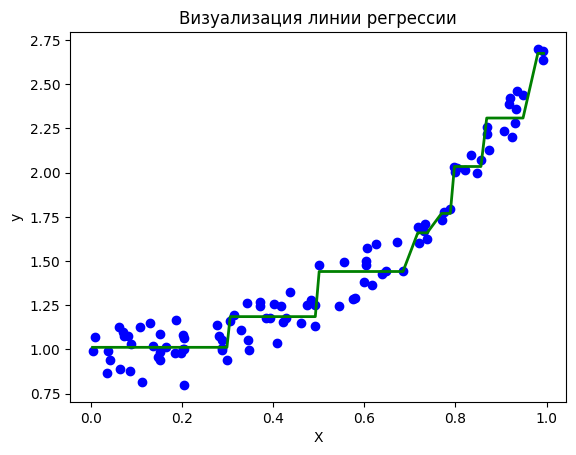

In [12]:
plt.scatter(X, y, c="b")

y_pred_reg = reg_tree.predict(X.reshape(-1, 1))
plt.plot(X, y_pred_reg, "g", lw=2)

plt.title('Визуализация линии регрессии')
plt.xlabel('X')
plt.ylabel('y')

### 10. Оцените качество работы модели. Создайте новое наблюдение и сделайте предсказание на нём.

In [13]:
from sklearn.metrics import r2_score, mean_squared_error
print('r2= ', r2_score(y, y_pred_reg))
print('MSE= ', mean_squared_error(y, y_pred_reg))

r2=  0.9693188837402038
MSE=  0.007500558270274448


In [19]:
observation_new = [[0.7]]
p = reg_tree.predict(observation_new)


Text(0, 0.5, 'y')

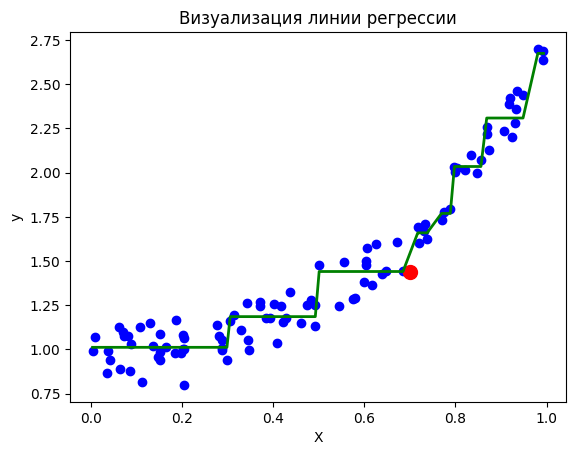

In [20]:
plt.scatter(X, y, c="b")

y_pred_reg = reg_tree.predict(X.reshape(-1, 1))
plt.plot(X, y_pred_reg, "g", lw=2)
plt.scatter(observation_new[0][0], p[0], c='r', s=100)


plt.title('Визуализация линии регрессии')
plt.xlabel('X')
plt.ylabel('y')

## Задания для самостоятельного выполнения
### 1. Загрузите встроенные данные sklearn.datasets.load_iris, взяв только последние два столбца (длина и ширина лепестков). Изобразите их на диаграмме рассеяния, подкрасив каждый класс некоторым цветом.

<Axes: >

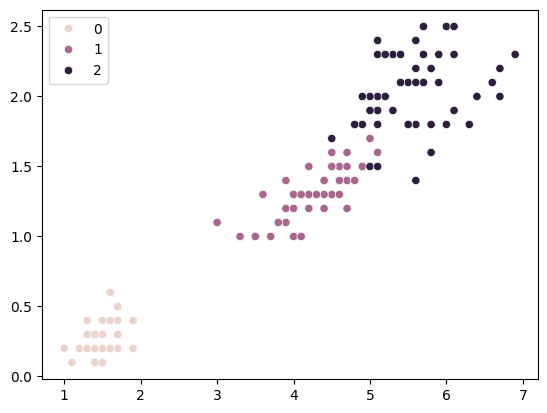

In [21]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data[:, 2:4]
y = iris.target
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y)

### 2. Обучите модель классификационного дерева принятия решений sklearn.tree.DecisionTreeClassifier глубины 4, используя энтропию. Визуализируйте соответствующий граф дерева принятия решений.

In [22]:
dtc = DecisionTreeClassifier(max_depth=4, random_state=RANDOM_SEED, criterion='entropy')
dtc.fit(X, y)

DecisionTreeClassifier(criterion='entropy', max_depth=4,
                       random_state=RandomState(MT19937) at 0xFFFF4714B340)

[Text(0.5, 0.9, 'x[1] <= 0.8\nentropy = 1.585\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(0.4090909090909091, 0.7, 'entropy = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(0.4545454545454546, 0.8, 'True  '),
 Text(0.5909090909090909, 0.7, 'x[1] <= 1.75\nentropy = 1.0\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(0.5454545454545454, 0.8, '  False'),
 Text(0.36363636363636365, 0.5, 'x[0] <= 4.95\nentropy = 0.445\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(0.18181818181818182, 0.3, 'x[1] <= 1.65\nentropy = 0.146\nsamples = 48\nvalue = [0, 47, 1]'),
 Text(0.09090909090909091, 0.1, 'entropy = 0.0\nsamples = 47\nvalue = [0, 47, 0]'),
 Text(0.2727272727272727, 0.1, 'entropy = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.5454545454545454, 0.3, 'x[1] <= 1.55\nentropy = 0.918\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(0.45454545454545453, 0.1, 'entropy = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.6363636363636364, 0.1, 'entropy = 0.918\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(0.818181818181

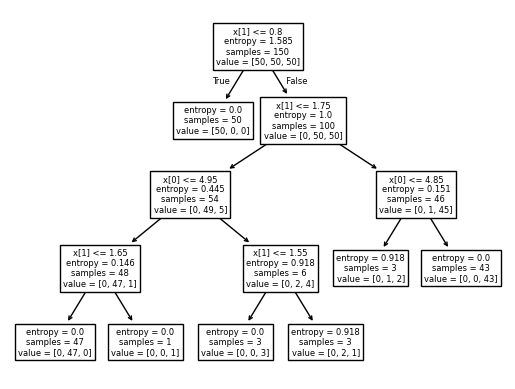

In [23]:
plot_tree(dtc)

### 3. Обучите модель классификационного дерева принятия решений sklearn.tree.DecisionTreeClassifier с разными глубинами (1, 2, 3, 4, 10), используя энтропию, и визуализируйте в каждом случае полученные разделяющие области. / 4. Выведите необходимые метрики для оценки работы моделей с разными глубинами. Сделайте вывод о том, какая модель лучше классифицирует данные.

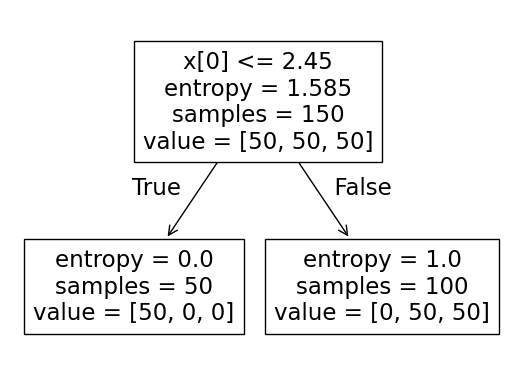

depth = 1
accuracy = 0.6578947368421053
f1_score = 0.6578947368421053
----------------------------------


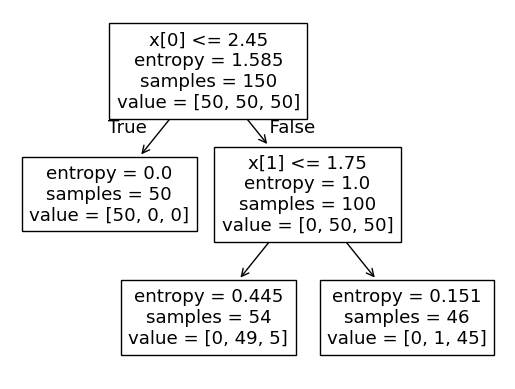

depth = 2
accuracy = 0.9736842105263158
f1_score = 0.9736842105263158
----------------------------------


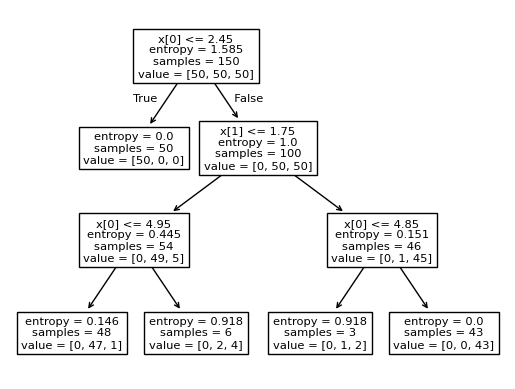

depth = 3
accuracy = 1.0
f1_score = 1.0
----------------------------------


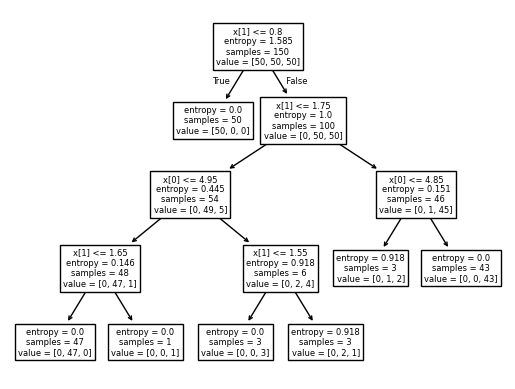

depth = 4
accuracy = 0.9736842105263158
f1_score = 0.9736842105263158
----------------------------------


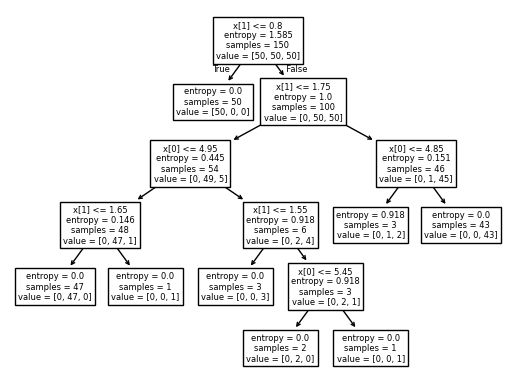

depth = 10
accuracy = 1.0
f1_score = 1.0
----------------------------------


In [24]:
from sklearn.model_selection import train_test_split
depths = [1, 2, 3, 4, 10]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=RANDOM_SEED)
for depth in depths:
    dtc = DecisionTreeClassifier(max_depth=depth, random_state=RANDOM_SEED, criterion='entropy')
    dtc.fit(X, y)
    plot_tree(dtc)
    plt.show()
    print('depth =', depth)
    print('accuracy =', accuracy_score(y_test, dtc.predict(X_test)))
    print('f1_score =', f1_score(y_test, dtc.predict(X_test), average='micro'))
    print('----------------------------------')

### 5. Загрузите весь датасет load_iris. Обучите модель классификационного дерева принятия решений sklearn.tree.DecisionTreeClassifier глубины 4, используя энтропию. Визуализируйте соответствующий граф дерева решений. Оцените качество работы модели.

In [25]:
X = iris.data 
y = iris.target
dtc = DecisionTreeClassifier(max_depth=4, random_state=RANDOM_SEED, criterion='entropy')
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=RANDOM_SEED)
dtc.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4,
                       random_state=RandomState(MT19937) at 0xFFFF4714B340)

In [26]:
y_pred = dtc.predict(X_test)
accuracy_score(y_test, y_pred), f1_score(y_test, y_pred, average='micro')

(0.9473684210526315, 0.9473684210526315)

In [27]:
confusion_matrix(y_test, y_pred)

array([[12,  0,  0],
       [ 0, 14,  2],
       [ 0,  0, 10]])

### 6. Загрузите встроенные данные sklearn.datasets.california_housing, взяв только столбец AveBedrms в качестве единственного признака. Изобразите данные на диаграмме рассеяния так, чтобы на одной оси были отмечены значения признака, а на другой - целевой переменной.

In [28]:
from sklearn.datasets import fetch_california_housing
ch = fetch_california_housing()
data = pd.DataFrame(data=ch.data, columns=ch.feature_names)
data['Target'] = ch.target
data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


<Axes: xlabel='AveBedrms'>

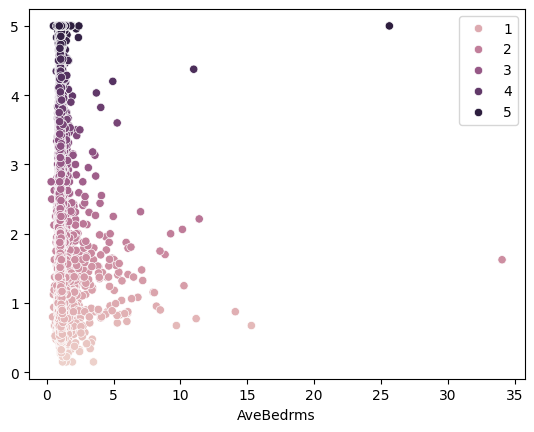

In [29]:
X = data['AveBedrms']
y = data['Target']
sns.scatterplot(x=X, y=ch.target, hue=ch.target)

### 7. Обучите модель регрессионного дерева принятия решений sklearn.tree.DecisionTreeRegressor, зафиксировав random_state=0, а остальными гиперпараметрами по умолчению.

In [30]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor(max_depth=4, random_state=0)
dtr.fit(X.to_frame(), y)

DecisionTreeRegressor(max_depth=4, random_state=0)

### 8. Визуализируйте соответствующий граф дерева решений и получившуюся кусочную линию регрессии.

[Text(0.5, 0.9, 'x[0] <= 1.103\nsquared_error = 1.332\nsamples = 20640\nvalue = 2.069'),
 Text(0.25, 0.7, 'x[0] <= 0.925\nsquared_error = 1.293\nsamples = 15760\nvalue = 2.137'),
 Text(0.375, 0.8, 'True  '),
 Text(0.125, 0.5, 'x[0] <= 0.922\nsquared_error = 1.171\nsamples = 705\nvalue = 1.988'),
 Text(0.0625, 0.3, 'x[0] <= 0.704\nsquared_error = 1.198\nsamples = 661\nvalue = 2.013'),
 Text(0.03125, 0.1, 'squared_error = 0.984\nsamples = 27\nvalue = 1.59'),
 Text(0.09375, 0.1, 'squared_error = 1.2\nsamples = 634\nvalue = 2.031'),
 Text(0.1875, 0.3, 'x[0] <= 0.923\nsquared_error = 0.609\nsamples = 44\nvalue = 1.604'),
 Text(0.15625, 0.1, 'squared_error = 0.185\nsamples = 9\nvalue = 1.17'),
 Text(0.21875, 0.1, 'squared_error = 0.657\nsamples = 35\nvalue = 1.716'),
 Text(0.375, 0.5, 'x[0] <= 1.048\nsquared_error = 1.298\nsamples = 15055\nvalue = 2.144'),
 Text(0.3125, 0.3, 'x[0] <= 0.926\nsquared_error = 1.271\nsamples = 9562\nvalue = 2.174'),
 Text(0.28125, 0.1, 'squared_error = 2.032\nsa

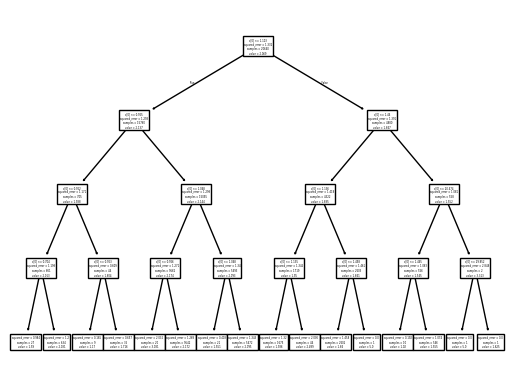

In [31]:
plot_tree(dtr)

In [32]:
y_pred_reg = dtr.predict(X.to_frame())

### 9. Оцените качество работы модели. Создайте новое наблюдение и сделайте предсказание на нём.

In [33]:
print('r2= ', r2_score(y, y_pred_reg))
print('MSE= ', mean_squared_error(y, y_pred_reg))

r2=  0.01802810189418158
MSE=  1.3075449755947046


In [35]:
observation_new = [[0.5]]
dtr.predict(observation_new)

/opt/conda/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([1.58955593])

/opt/conda/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


Text(0, 0.5, 'y')

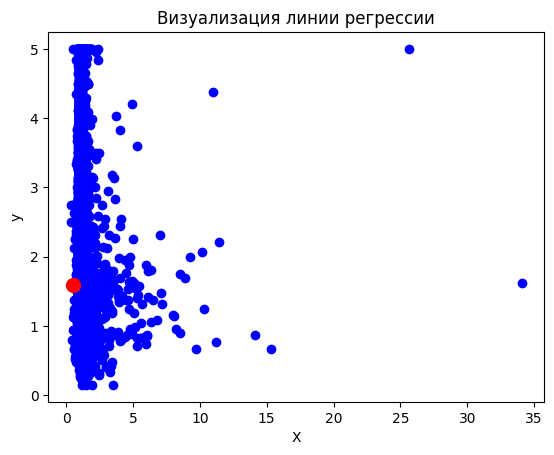

In [36]:
plt.scatter(X, y, c="b")
plt.scatter(observation_new[0], dtr.predict(observation_new), c='r', s=100)


plt.title('Визуализация линии регрессии')
plt.xlabel('X')
plt.ylabel('y')

### 10. Загрузите весь датасет fetch_california_housing. Обучите ту же модель. Визуализируйте соответствующий граф дерева решений и оцените качество работы модели.

In [37]:
fch = fetch_california_housing()
X = fch.data
y = fch.target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=RANDOM_SEED, test_size=0.2)
dtr = DecisionTreeRegressor(max_depth=4, random_state=0)
dtr.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=4, random_state=0)

[Text(0.5, 0.9, 'x[0] <= 4.996\nsquared_error = 1.327\nsamples = 16512\nvalue = 2.064'),
 Text(0.25, 0.7, 'x[0] <= 3.067\nsquared_error = 0.824\nsamples = 12933\nvalue = 1.725'),
 Text(0.375, 0.8, 'True  '),
 Text(0.125, 0.5, 'x[2] <= 4.139\nsquared_error = 0.547\nsamples = 6269\nvalue = 1.35'),
 Text(0.0625, 0.3, 'x[5] <= 2.903\nsquared_error = 0.662\nsamples = 2182\nvalue = 1.651'),
 Text(0.03125, 0.1, 'squared_error = 0.933\nsamples = 933\nvalue = 1.973'),
 Text(0.09375, 0.1, 'squared_error = 0.325\nsamples = 1249\nvalue = 1.411'),
 Text(0.1875, 0.3, 'x[0] <= 2.374\nsquared_error = 0.411\nsamples = 4087\nvalue = 1.189'),
 Text(0.15625, 0.1, 'squared_error = 0.276\nsamples = 2002\nvalue = 0.971'),
 Text(0.21875, 0.1, 'squared_error = 0.451\nsamples = 2085\nvalue = 1.397'),
 Text(0.375, 0.5, 'x[5] <= 2.396\nsquared_error = 0.828\nsamples = 6664\nvalue = 2.078'),
 Text(0.3125, 0.3, 'x[6] <= 37.935\nsquared_error = 1.237\nsamples = 1659\nvalue = 2.745'),
 Text(0.28125, 0.1, 'squared_err

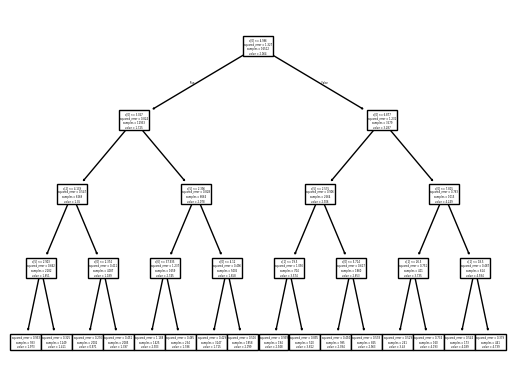

In [38]:

plot_tree(dtr)

In [39]:
y_pred_fch = dtr.predict(X_test)
r2_score(y_test, y_pred_fch), mean_squared_error(y_test, y_pred_fch)

(0.562889515522073, 0.5902171721663291)